# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [29]:
from scipy.stats import uniform
import numpy as np
import seaborn as sns
import matplotlib as plt
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.0289261  2.91856164 2.09537029 2.60635541 2.52579451 2.54342763
 2.46352036 2.13408491 2.2148734  2.56840836]


In [105]:
def dist(bottom,ceiling,counter):
    x=uniform.rvs(size=counter)
    a = bottom
    b = ceiling
    randoms  = a + (b-a)*x    
    return randoms


first=dist(10,15,100)
second=dist(10,60,1000)      
print(first[:5])
print(second[:5])

[11.96958732 14.76942198 10.62357489 11.42996543 14.87717382]
[45.25332797 11.13612515 46.12864192 20.27276449 58.86641283]


In [106]:

import matplotlib.pyplot as plt
import numpy as np


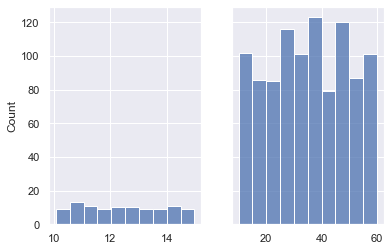

In [121]:
fig, axes = plt.subplots(1, 2,sharey=True)

sns.histplot( data=first,bins=10, ax=axes[0])
ylabel='Count'
sns.histplot( data=second,bins=10, ax=axes[1])
ylabel='Count'




How are the two distributions different?

In [ ]:
# your answer below

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

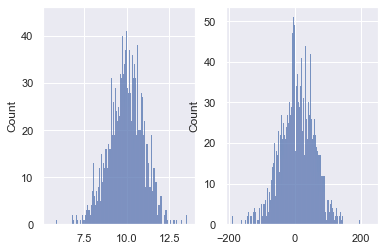

In [73]:
from scipy.stats import norm
normal_1 = norm (10, 1)
normal_2 = norm (10, 50)
sample_normal_1 = normal_1.rvs(10000)
sample_normal_2 = normal_2.rvs(10000)
fig, axes = plt.subplots(1, 2)

sns.histplot( data=sample_normal_1,bins=1000, ax=axes[0])
ylabel='Count'
sns.histplot( data=sample_normal_2,bins=1000, ax=axes[1])
ylabel='Count'



How are the two distributions different?

In [ ]:
# your answer below

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

<AxesSubplot:xlabel='Fuel Barrels/Year', ylabel='Count'>

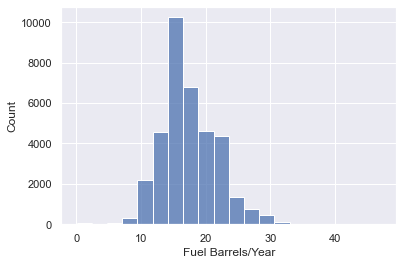

In [86]:
import pandas as pd
vehicles= pd.read_csv ('vehicles.csv')

sns.histplot( data=vehicles,x='Fuel Barrels/Year',bins=20)

In [83]:
vehicles.sample(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
15876,GMC,Sierra 1500 4WD,1995,5.7,8.0,Automatic 4-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks,Regular,25.354615,11,15,13,683.615385,2550
34675,Volkswagen,Jetta III GLX,1994,2.8,6.0,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,17.347895,16,23,19,467.736842,1750


2. CO2 Emission Grams/Mile 

<AxesSubplot:xlabel='CO2 Emission Grams/Mile', ylabel='Count'>

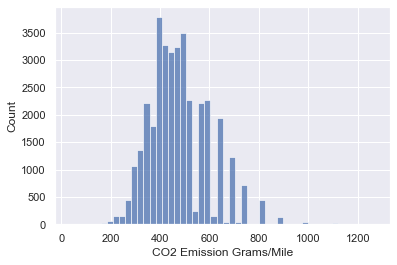

In [84]:
sns.histplot( data=vehicles,x='CO2 Emission Grams/Mile',bins=50)

3. Combined MPG

<AxesSubplot:xlabel='Combined MPG', ylabel='Count'>

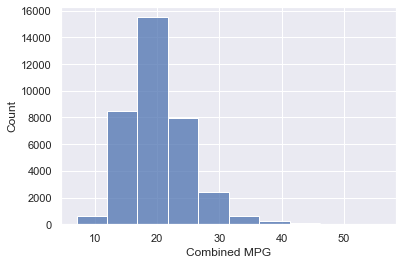

In [85]:
sns.histplot( data=vehicles,x='Combined MPG',bins=10)

Which one(s) of the variables are nearly normally distributed? How do you know?

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10000. 

1. Use the function to generate two number sequences with the size of 2 and 200.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [ ]:
list_n(2)
fig, axes = plt.subplots(1, 2,sharey=True)

sns.histplot( data=first,bins=10, ax=axes[0])
ylabel='Count'
sns.histplot( data=second,bins=10, ax=axes[1])
ylabel='Count'

(array([0.1878364 , 0.99848929, 0.05761384, ..., 9.99291066, 0.752271  ,
        1.16591906]),
 array([144.70589374, 146.33174525,  79.71999151, ...,  73.54156641,
        413.0268591 ,  73.97800807]))

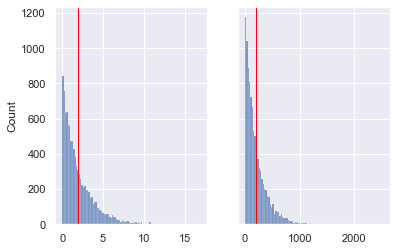

In [136]:
from scipy.stats import expon
def list_n(size1,size2):
    list_f = np.random.exponential(size1, 10000)
    
    fig, axes = plt.subplots(1, 2,sharey=True)
    

    sns.histplot( data=list_f,bins=100, ax=axes[0])
    ylabel='Count'
    axes[0].axvline(list_f.mean(), color='red', linewidth=1)
    list_f1 = np.random.exponential(size2, 10000)
    sns.histplot( data=list_f1,bins=100, ax=axes[1])
    ylabel='Count'
    
    axes[1].axvline(list_f1.mean(), color='red', linewidth=1)
    return list_f,list_f1

list_n(2,200)


How are the two distributions different?

array([  2.59903426, 373.64772931, 501.02906899, ..., 199.45823177,
        82.99850039, 140.05398266])

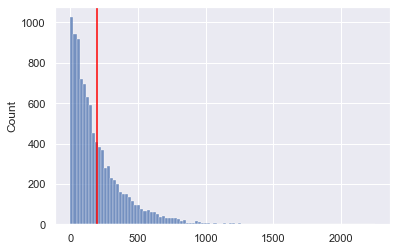

In [124]:
list_n(200)

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [151]:
sample.mean()

10.982720058588436

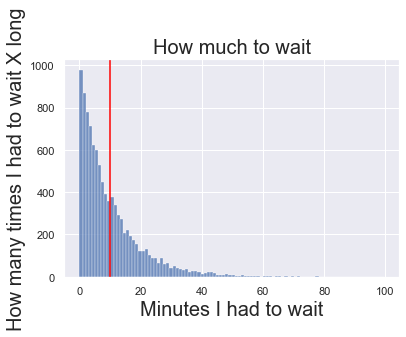

In [162]:
my_test= expon(scale=10)
sample = my_test.rvs(10000)
fig = sns.histplot(sample)
fig.axvline(x = sample.mean(), color="red")
plt.xlabel("Minutes I had to wait", fontsize=20)
plt.ylabel("How many times I had to wait X long",  fontsize=20)
fig.set_title("How much to wait",  fontsize=20);


# Hint: This is same as saying P(x<15)

What is the probability that the customer will spend more than 15 minutes

In [163]:
my_test.cdf(15)

0.7768698398515702

In [164]:
# your answer here

In [166]:
1-my_test.cdf(15)

0.2231301601484298